In [1]:
pip install pycryptodome

In [2]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import random
import cv2
from math import log
from tqdm import tqdm
from PIL import Image
import urllib.request
import time
# from google.colab.patches import cv2_imshow

In [3]:
from Crypto.PublicKey import RSA
import time
import sys
import os

start_time = time.time()
print(start_time)

1616492649.638439


In [4]:

#sender Keys
keyPair = RSA.generate(bits=1024)
print(f"Public key:  (n={hex(keyPair.n)}, e={hex(keyPair.e)})")
print(f"Private key: (n={hex(keyPair.n)}, d={hex(keyPair.d)})")

#Reciver Keys
keyPair2 = RSA.generate(bits=1024)
print(f"Public key2:  (n={hex(keyPair2.n)}, e={hex(keyPair2.e)})")
print(f"Private key2: (n={hex(keyPair2.n)}, d={hex(keyPair2.d)})")

Public key:  (n=0xcca3951e25ab8db357ad6fd9b0f9abbdf5ac214d072117544cb4ac25bfc72060f8ef72758085f0bc4596a665e1cf3ff9e940954c87222c00a103a2a539264f3a0ac3e67cfdf5271771fdeecc285454692b3a77fedb27faf543610f2810a6b56f0123ddc7106a5cfbd58bcac33fa24747d04b4e02d762bf270855707fe49a055b, e=0x10001)
Private key: (n=0xcca3951e25ab8db357ad6fd9b0f9abbdf5ac214d072117544cb4ac25bfc72060f8ef72758085f0bc4596a665e1cf3ff9e940954c87222c00a103a2a539264f3a0ac3e67cfdf5271771fdeecc285454692b3a77fedb27faf543610f2810a6b56f0123ddc7106a5cfbd58bcac33fa24747d04b4e02d762bf270855707fe49a055b, d=0xa6fce9c723083de6562ab2361b0371d0de33ab2cf71f5ab130b2d2332faea74e5a74d29aedd8de9c53d0de520f1516e8b11d4177a4620f342830163deb47c6a767d706d6aa44b491680422b99607aa8f38f9e55211f1f6ff337f7d031e82972d770b978fc60437e598296ea6d819ff249ab3f88118501d980b3ff000e14681c1)
Public key2:  (n=0xd7f09dbae2fcfc782ffcd47b8c7526af9d81d73dd92df83feaf234dc7caf9a63f5827230fdc87e3dd9c735aebe37fe346913fb7516bb1565cc848ee5ba907f9042226e2ed96fe03c7d76b070ed78

In [5]:
time_key_generation  = time.time() - start_time
start_time = time.time()

In [6]:
pip install bchlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import bchlib
import hashlib
from PIL import Image
import cv2
import numpy
from numpy import asarray
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import imageio

Size of original image in bytes:  5706


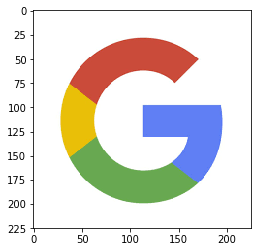

In [9]:
img = imageio.imread('1.png')
imshow(img)
# print (os.stat('0.png').st_size)
print("Size of original image in bytes: ",os.path.getsize('1.png'))

In [10]:
start_time = time.time()
print(start_time)

1616492688.2239492


In [11]:
# create a bch object
BCH_POLYNOMIAL = 8219
BCH_BITS = 72
bch = bchlib.BCH(BCH_POLYNOMIAL, BCH_BITS)

In [12]:
#data input
a = asarray(img) #image data converted into a 3-D array
print(a.shape)
temp = bytearray(a)#3-d array converted into a byte array
l = len(temp)
final_corrupt = bytearray(0)
final_data = bytearray(0)
enc_sha = []
cor_sha = []
dec_sha = []


h=hashlib.md5(temp)
print (h.hexdigest())

(225, 225, 4)
354ca930b0a0070a73378cb71e298458


In [13]:
#enter the MD5 hash value
# input_corrupt = input("Enter corruption string: ")
input_corrupt = '354ca930b0a0070a73378cb71e298458'

In [14]:
#image encryption starts
for n in range(0, 202500, 900):#loading a 900 length block of the bytearray
    data = bytearray(0)
    corrupt2 =''
    
    for i in range(n, n + 900):
        data.append(temp[i]);
    
    ###########Create Oct corrupt
    corrupt = bytearray(input_corrupt, 'UTF-8')
    for i in range(len(corrupt)):
        s = oct(corrupt[i])[2:]
        corrupt2 = corrupt2 +s

    corrupt = corrupt2
#     print(corrupt)
    ######################################
    
    ######### encode and make a "packet"
    ecc = bch.encode(data)
    print(len(ecc))
    packet = data + ecc
    #####################################
        
    ##### YE KUCH KAAM KA NAHI HE
    # print hash of packet
    sha1_initial = hashlib.sha1(packet)
    print('sha1 original: %s' % (sha1_initial.hexdigest(),))
    enc_sha.append(sha1_initial.hexdigest())# saving the initial encoded packet 
    #####################################
    
    # make BCH_BITS errors
    for i in range(BCH_BITS):
        bytenum =i
        bitnum = int(corrupt[i])
#         print(1 << bitnum)
        packet[bytenum] ^= (1 << bitnum)
#         print(packet[bytenum])
    
    #appending corrupted data of each block
    for i in range(len(packet)):
        final_corrupt.append(packet[i])
    
   # print(len(packet))
    # print hash of packet
    sha1_corrupt = hashlib.sha1(packet)
    print('sha1 corrupted: %s' % (sha1_corrupt.hexdigest(),))
    cor_sha.append(sha1_corrupt.hexdigest())# saving the corrupted packet into an array

117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1

117
sha1 original: 39e8152204ee48b6a8070d463f62521d7a72e2cc
sha1 corrupted: 538f110a979ddac08e4d7172fc838fda0a7c3d11
117
sha1 original: 87c077cb488c7af8ce802205634c236496762752
sha1 corrupted: 8d307c0441d2e92566d8df60e30fefd729bb4fab
117
sha1 original: 6e152c9c8abff7565c7245d8b2db982477578ce4
sha1 corrupted: 7a3cbaaa93410e8848a3a29ab9d46d84a43d3032
117
sha1 original: 87055bc64e1f606ac2b6948ea3df6068a6b828b5
sha1 corrupted: 8d55f3edd86b2fdb379d08fd05c105c4e29fb687
117
sha1 original: dc08b1ed7c2b6551f0d72115f7281b57c8bb2134
sha1 corrupted: 15e1847755f1d92ec16e33b48013d2ad788fec2d
117
sha1 original: 009d6a1dc923449699516947ea5b33ac74e14bb1
sha1 corrupted: 6d01c5c640b6a58e2949fe2257e1688a28186a68
117
sha1 original: 46a17cac3d903c1370ab2db2900bb3db7242914e
sha1 corrupted: eb618bcf8030b539cfb82fe7600dcdbbec5d8428
117
sha1 original: 3bf2a82f7c3dacfccd520a0964e34c4432a8f03b
sha1 corrupted: 1f026dfe458844092c2aedaf856e12df30994272
117
sha1 original: 7af7299f613f593b301ed05a5bf1b9e000ff213e
sha1

117
sha1 original: f615d2033a36193b3fb5aa86ff8fa7e3bf97c483
sha1 corrupted: d4d32fc44839f10a84de193c86394e40bb9a5e47
117
sha1 original: 9b2e6d8ed2184c7c750be9f178c6aa2253935ff7
sha1 corrupted: 1ba30dd4ac7b727e7dbdb6d9f602d4338310754b
117
sha1 original: 38c9f92660a0efcc52a1460b060e764f473de27b
sha1 corrupted: 87433493c0562d36f389f1f40c3ba39b9a311a88
117
sha1 original: 8f3bc37d20924d63ec3c66e1f07c54e4442f82db
sha1 corrupted: db6405c19827d3101671fc990690295341a27192
117
sha1 original: 34d6ae841c39f9067e0673394b2bdba83bad6007
sha1 corrupted: 699be279e26912251990953b15234bf9bf8ad979
117
sha1 original: 61b6d4592d6c02b72cd784b4748a19e1a90749b2
sha1 corrupted: 7d96e324043dd22b07435d297ce9e2bc2ee6a4d2
117
sha1 original: cac8f11fa70252ebb524d314c7fea302580ba54b
sha1 corrupted: 086946706dc8b3d124f2a09cc33ca9c13c717fdb
117
sha1 original: 4ef5d25752c9c293963d060ecb3230b91aef7a01
sha1 corrupted: 7fb43d5e91b7cfacf7423dd6d9001f4d573663b6
117
sha1 original: 11f62fb1b522023ab273db4fdf63ae0046c472c3
sha1

117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1 corrupted: aa8586f7bc305f82e5954aac7f1b9014753cd006
117
sha1 original: e7d991ec778a887ee3bec9db230e66ab58e877f4
sha1

In [15]:
time_enc_bch  = time.time() - start_time
start_time = time.time()

In [16]:
# RSA sign the message

hash= 0x354ca930b0a0070a73378cb71e298458
signature = pow(hash, keyPair.d, keyPair.n)
print("Signature:", hex(signature))

Signature: 0x3297a0293f9d845a79ae0bcb8669be5fef7d7acff2d559472268312a53b788658838a00c2f6ad23b9cb4a5900767278b05867aac8e2e9f2890b75f144ea415b867eee02472a088c385afaa08c6e9cae0407c02efffc11d0f31fc063635f3b13c10cc6be0250a009c7f90c8926fd73ece51bd65eecef9a54114c2fd4b134d0586


In [17]:
#signature pow public key of Sender
finalMessage = pow(signature, keyPair2.e, keyPair2.n)
print("Signature :",finalMessage)

Signature : 23543828370747076716657815238795447081261003590652862295357452793433246598702225981535311754296762826416859289723849636244314017705634770719918849647302447585206079336839785744439007504816549468251036422040656793782202103560530321927799175830781216205438254334844395936073145701294524588927076494745175940697


In [18]:
#decoding
recoveredSignature = pow(finalMessage, keyPair2.d, keyPair2.n)
print("recoveredSignature:", hex(recoveredSignature))

recoveredSignature: 0x3297a0293f9d845a79ae0bcb8669be5fef7d7acff2d559472268312a53b788658838a00c2f6ad23b9cb4a5900767278b05867aac8e2e9f2890b75f144ea415b867eee02472a088c385afaa08c6e9cae0407c02efffc11d0f31fc063635f3b13c10cc6be0250a009c7f90c8926fd73ece51bd65eecef9a54114c2fd4b134d0586


In [19]:

start_time = time.time()

In [20]:
for n in range(0, 228825, 1017):
    packet2 = bytearray(0)
    finalCorrect= ''
    for i in range(n, n + 1017):
        packet2.append(final_corrupt[i]);# making a copy of the corrupted bytearray
        
    # de-packetize
    data, ecc = packet2[:-bch.ecc_bytes], packet2[-bch.ecc_bytes:]
    
    # correct
    bitflips = bch.decode_inplace(data, ecc)
    print('bitflips: %d' % (bitflips)) # calculating the no. of bitflips and printing it
    
    # packetize
    packet = data + ecc
    for i in range(len(data)):
        final_data.append(data[i]) # appending each decoded data block into a byte array
    
    ####### YE KUCH KAAM KA NAHI HE
    # print hash of packet
    sha1_corrected = hashlib.sha1(packet)
    print('sha1: %s' % (sha1_corrected.hexdigest(),))
    dec_sha.append(sha1_corrected.hexdigest()) # copying the decoded data block into an array
    ##########################################
     
    print("getting back corrupt")
    
    for i in range(BCH_BITS):
#         print(packet[i])
        packet2[i]^= packet[i]
        finalCorrect= finalCorrect+str(packet2[i])
#         print(packet2[i])

#     print(packet2[0:71])# printing the string used to corrupt each block

bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec7

bitflips: 72
sha1: 2ae9ed8a9693935b9a6be82d266654824606455a
getting back corrupt
bitflips: 72
sha1: d6b1631d64c782a3a06fe23802a76125c2b99353
getting back corrupt
bitflips: 72
sha1: e364a6ea6e210e3defc058d42d238e7ac502f613
getting back corrupt
bitflips: 72
sha1: aeb8a4babbbb6ac0d1b6cfdfcce3dc0a079159fa
getting back corrupt
bitflips: 72
sha1: f00661a9684b3f71e4e282c94c4d76bbdce22914
getting back corrupt
bitflips: 72
sha1: e47b4285ba52d9f802c4e75062c266b20b0bf2cc
getting back corrupt
bitflips: 72
sha1: ac6b4fe21ad9e8c90ea950be5c5085c0b8c812ad
getting back corrupt
bitflips: 72
sha1: 733a848564ef1f77a9f08d80ed1869c3403f0c47
getting back corrupt
bitflips: 72
sha1: 908b4d6ec0b346205b2bc81be26512c166832a25
getting back corrupt
bitflips: 72
sha1: 3716c18f55ed3038c877291609fe05f3958e686a
getting back corrupt
bitflips: 72
sha1: 0c4680905cee03c14c18aac80338a2169ed1bdc7
getting back corrupt
bitflips: 72
sha1: b26f1de63d9bceeaeb30aee108585eb8baf0dcb4
getting back corrupt
bitflips: 72
sha1: 0364df36e

bitflips: 72
sha1: c68c18a2b1a7e1b56cf544b4c7ae0107d508b065
getting back corrupt
bitflips: 72
sha1: 7614c2ec79c14a7d414c269841796a102a485915
getting back corrupt
bitflips: 72
sha1: 216b89e12183b0bab266b910fdff7785f0bfc9c8
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec778a887ee3bec9db230e66ab58e877f4
getting back corrupt
bitflips: 72
sha1: e7d991ec7

In [21]:
time_dec_bch  = time.time() - start_time
start_time = time.time()

In [22]:
######## YE ACTUAL DIGITAL SIGNATURE KA PART NAHI HE ########
############ BCH DHANG SE CHALA VO DEKH RAHE HE #############

#Check if decripted value after removing XOR is same as enc val.  
# compare output with input
for i in range(0, 225):
    if enc_sha[i]==dec_sha[i]: # checking if the encoded data block and decoded data block are equal
        print("Corrected!")
    else:
        print("Failed!")

Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!
Corrected!

In [23]:
#this is original image MD5 hash in OCT
print(finalCorrect)

64864326416216821621282648641216464121626416416412864121626412864864864128128121682164641286422163264412821281641664321281


In [24]:
#according to me this code shoud not exist
for i in range(len(final_data), len(temp)): # appending the left out elements after creating the block
    final_data.append(temp[i])

Size of recovered image in bytes:  12298


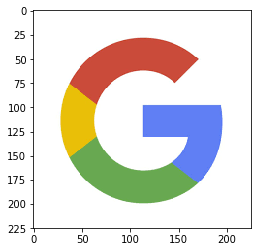

In [25]:
#converting the byte array to a numpy array of a required dimension and then using opencv to get the image
flatNumpyArray = numpy.array(final_data)
bgrImage = flatNumpyArray.reshape(225, 225,4)

imageio.imwrite('recovered_image.png', bgrImage)
imshow(imageio.imread('recovered_image.png'))
print("Size of recovered image in bytes: ",os.path.getsize('recovered_image.png'))

In [26]:
start_time = time.time()

In [27]:
#Hashing retrived image
h2=hashlib.md5(temp)

# print (h2.hexdigest())
corrupt2 =''
retriveCorrect= ''
corrupt = bytearray(h2.hexdigest(), 'UTF-8')
for i in range(len(corrupt)):
    s = oct(corrupt[i])[2:]
    corrupt2 = corrupt2 +s

corrupt = corrupt2

for i in range(len(corrupt)):
    p = int(corrupt[i])
    retriveCorrect= retriveCorrect+str(1<<p)

print(retriveCorrect)

64864326416216821621282648641216464121626416416412864121626412864864864128128121682164641286422163264412821281641664321281


In [28]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.3328404426574707 seconds ---


In [29]:
#Comparing RetriveImage hash VS Hash from XOR
if(retriveCorrect==finalCorrect):
    print('true')

true


In [30]:
time_compare_hash  = time.time() - start_time
start_time = time.time()

In [31]:
print(len(final_corrupt))
pp= numpy.zeros(22, dtype= int)
final_corrupt2= numpy.append(final_corrupt, pp)
print(len(final_corrupt2))
while(len(final_corrupt2)!=234112):
  final_corrupt2 = numpy.append(final_corrupt2,0)
len_final_corrupt = print(len(final_corrupt2))

228825
228847
234112


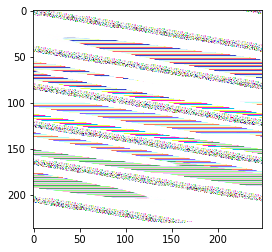

In [32]:
############## PRINT ENCODED IMAGE ###################################
#Length of byte array not multiple of 3 (in case of png 4), thus
# cannot divide array in 3 parts.
flatNumpyArray = numpy.array(final_corrupt2)
bgrImage2 = flatNumpyArray.reshape(236,248, 4)
cv2.imwrite('corrupted_image.png', bgrImage2)
imshow(Image.open('corrupted_image.png'))

In [33]:
a = asarray(bgrImage) #image data converted into a 3-D array
temp = bytearray(a)#3-d array converted into a byte array
recoveredh=hashlib.md5(temp)
print (recoveredh.hexdigest())

354ca930b0a0070a73378cb71e298458


In [34]:
# RSA verify signature

#the decripted message we recive from pipeline and its hash

# msg = b'354ca930b0a0070a73378cb71e298458'
# hash = int.from_bytes(sha256(msg).digest(), byteorder='big')

hash= 0x354ca930b0a0070a73378cb71e298458 # This is recoveredh with 0x

#signature pow public key
hashFromSignature = pow(recoveredSignature, keyPair.e, keyPair.n)
print("Signature valid:", hash == hashFromSignature)

Signature valid: True


In [35]:
print("time_key_generation",time_key_generation)
print("time_enc_bch",time_enc_bch)
print("time_dec_bch",time_dec_bch)
print("time_compare_hash",time_compare_hash)

time_key_generation 3.9443962574005127
time_enc_bch 10.805553436279297
time_dec_bch 4.242396354675293
time_compare_hash 4.747894525527954


In [36]:
import numpy as np
image = Image.open('corrupted_image.png')
new_image = image.resize((225, 225))
new_image.save('corrupted_image.png')

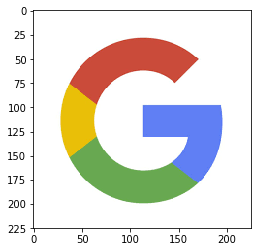

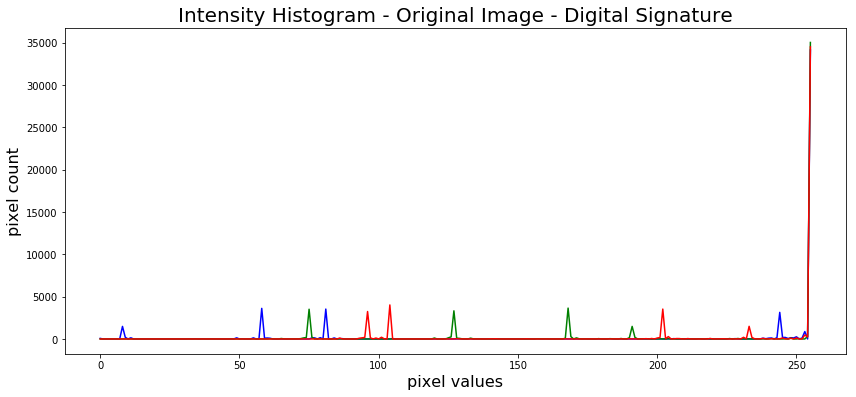

In [37]:
image = "1"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = imageio.imread(image + ext)
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image - Digital Signature', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

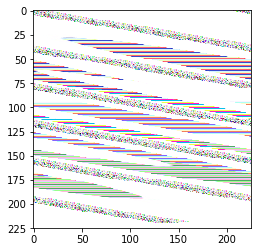

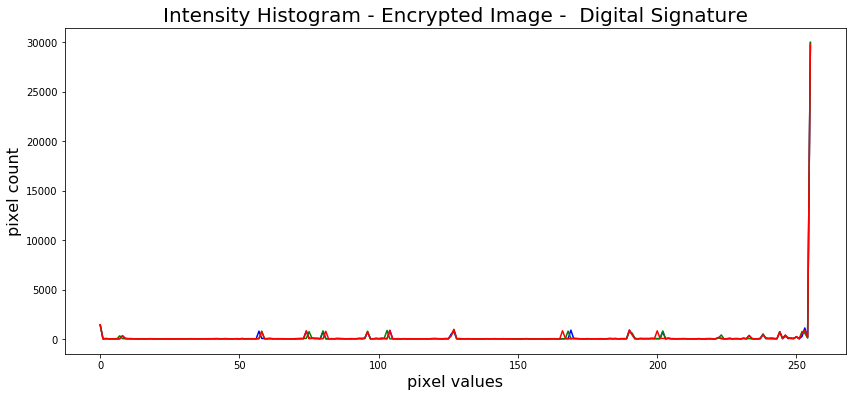

In [38]:
image = "corrupted_image"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = imageio.imread(image + ext)
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Encrypted Image -  Digital Signature', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

In [39]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

225


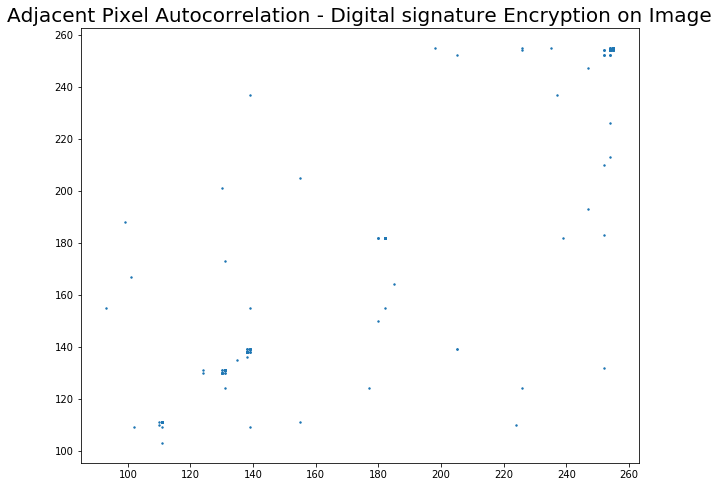

In [41]:
image = "1"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Digital signature Encryption on Image', fontsize=20)
plt.show()

225


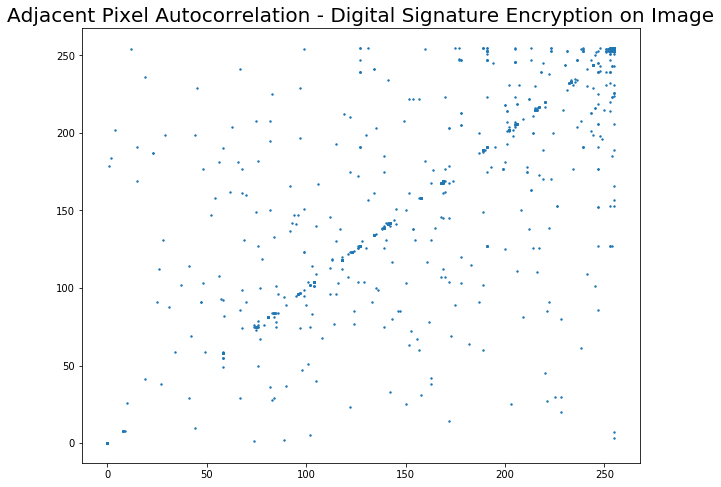

In [42]:
image = "corrupted_image"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Digital Signature Encryption on Image', fontsize=20)
plt.show()